## Lead Score Project

### Step 1: Importing  Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing dataset
lead = pd.read_csv(r"C:\Users\em574\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

### Step 2: Inspecting the Dataframe

In [5]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#number of rows and columns
lead.shape

(9240, 37)

### Step 3: Data Cleaning

In [9]:
# checking null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# replacing the 'select' with Nan
# This is because customer did not select any option from the list, hence it shows select.
lead = lead.replace('Select',np.nan)

In [11]:
#percentage of nullvalues
(100*lead.isnull().sum())/len(lead)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)),2)>70)].columns, 1)

In [13]:
(100*lead.isnull().sum())/len(lead)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [14]:
# we will take care of null values in each columns one by one.

In [15]:
# the highest null value col 
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

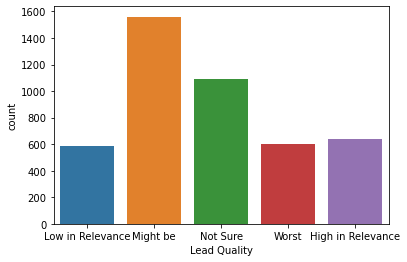

In [16]:
sns.countplot(lead['Lead Quality'])

In [17]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan,'Not Sure')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

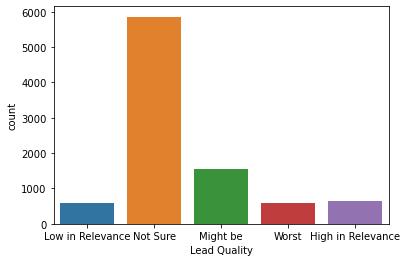

In [18]:
sns.countplot(lead['Lead Quality'])

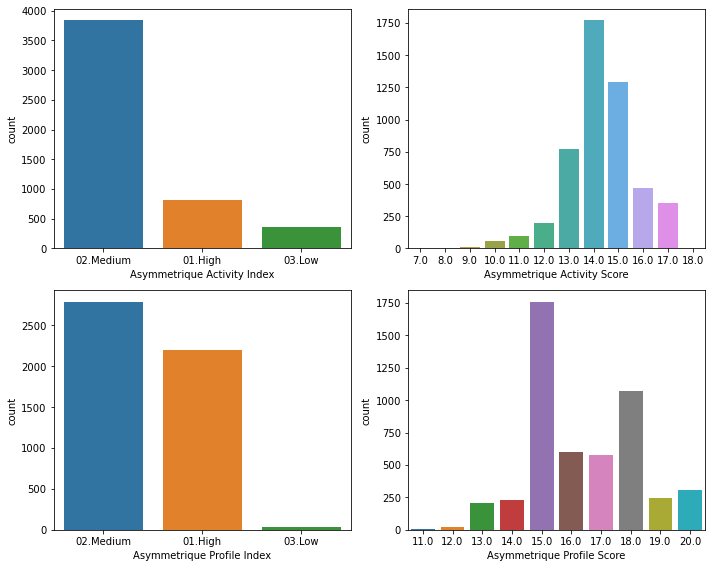

In [19]:
#second highest null vaule columns
fig, axs = plt.subplots(2,2, figsize =(10, 8))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'],ax= axs[0,0])
plt2 = sns.countplot(lead['Asymmetrique Activity Score'], ax=axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax=axs[1,0])
plt4 = sns.countplot(lead['Asymmetrique Profile Score'], ax=axs[1,1])
plt.tight_layout()

In [20]:
## 45% of null values are present so we are going to drop these columns..
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'], 1)

In [21]:
round((100*lead.isnull().sum())/len(lead), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [22]:
#3rd highest null values
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

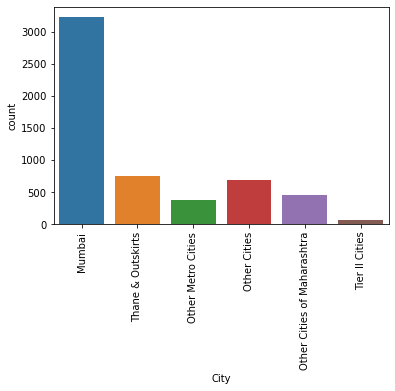

In [23]:
sns.countplot(lead.City)
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

In [24]:
# most of data represents the city mumbai so we will impute missing values as mumbai.
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [25]:
#4th highest null values
lead.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

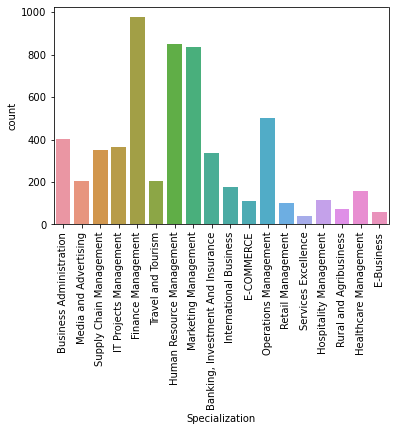

In [26]:
sns.countplot(lead.Specialization)
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

In [27]:
# we will impute the missing values as 'others' since the person might be a student or not have decided the specialization.
lead.Specialization = lead.Specialization.replace(np.nan, 'Others')

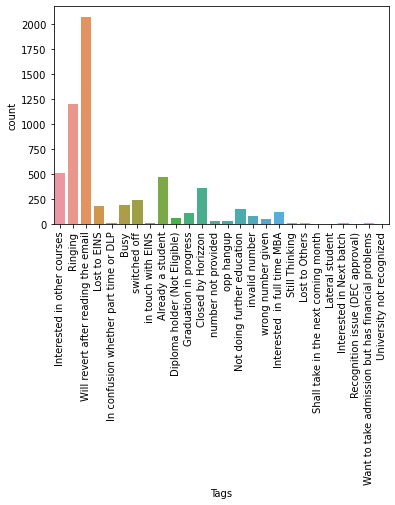

In [28]:
sns.countplot(lead.Tags)
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

In [29]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [30]:
#imputing the missing value
lead.Tags = lead.Tags.replace(np.nan, 'Will revert after reading the email')

In [31]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

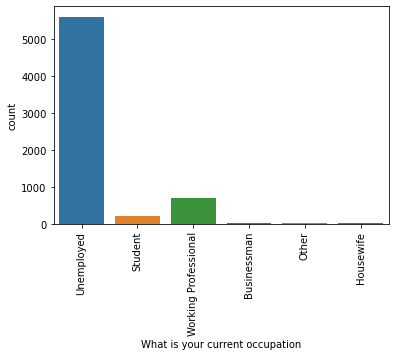

In [32]:
sns.countplot(lead['What is your current occupation'])
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

In [33]:
# imputing the missing values
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [34]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
# imputing the missing values with most frquent value
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [36]:
## imputing the missing values
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
Sweden                     3
Italy                      2
China                      2
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Bangladesh                 2
Ghana                      2
Tanzania                   1
Russia                     1
Sri Lanka                  1
Liberia                    1
Switzerland                1
Denmark                    1
Kenya         

In [37]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [38]:
round((100*lead.isnull().sum())/len(lead), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [39]:
# dropping those null values which around 2%
lead.dropna(inplace=True)

In [40]:
round((100*lead.isnull().sum())/len(lead), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Step 4: EDA

#### Univariate Analysis

In [41]:
# The target var is converted which indicates that whether a person is successfully enorlled (1) or not (0).

In [42]:
converted = round((sum(lead.Converted)/len(lead.Converted))*100,2)
converted

37.86

In [43]:
# Since 'Prospect ID', 'Lead Number' represent unique values so we are dropping the cols.
lead['Prospect ID'].unique()

array(['7927b2df-8bba-4d29-b9a2-b6e0beafe620',
       '2a272436-5132-4136-86fa-dcc88c88f482',
       '8cc8c611-a219-4f35-ad23-fdfd2656bd8a', ...,
       'aac550fe-a586-452d-8d3c-f1b62c94e02c',
       '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9',
       '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'], dtype=object)

In [44]:
lead['Lead Number'].unique()

array([660737, 660728, 660727, ..., 579545, 579538, 579533], dtype=int64)

In [45]:
lead.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [46]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

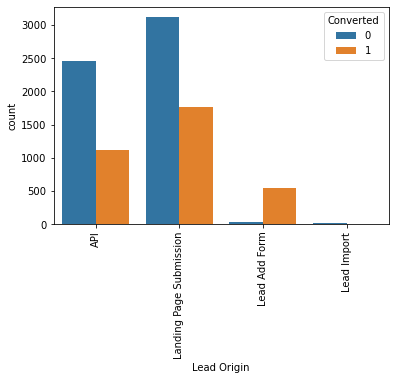

In [47]:
sns.countplot(lead['Lead Origin'],hue = 'Converted', data=lead)
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

Inference:

    1. Count of API and Landing Page Submission has considerable lead count and conversion rate is moderate.
    2. Although the count of lead in Lead Add Form is lower, the conversion rate is higher.
    3. Lead import has very less count. 
    

To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [48]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
blog                    1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

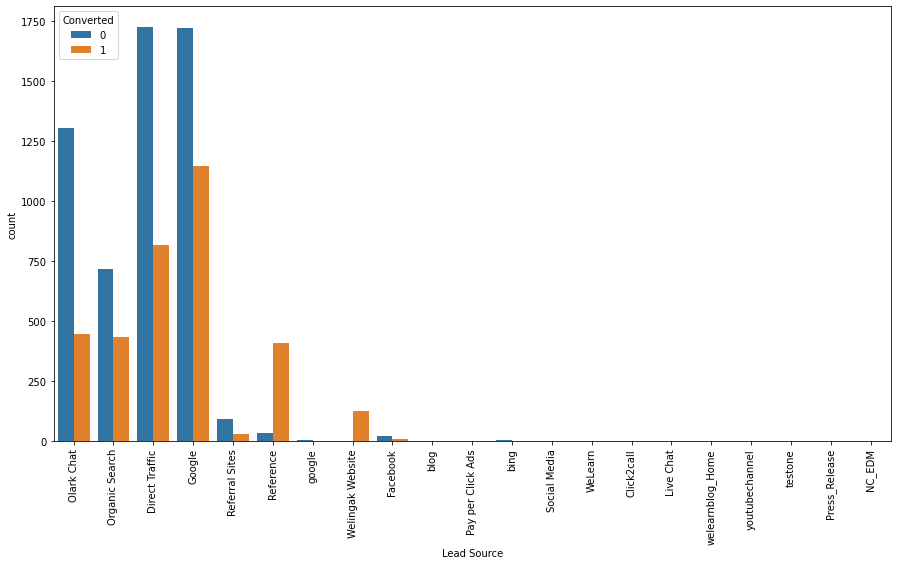

In [49]:
fig, axs= plt.subplots(figsize=(15,8))
sns.countplot(lead['Lead Source'],hue = 'Converted', data=lead)
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

In [50]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

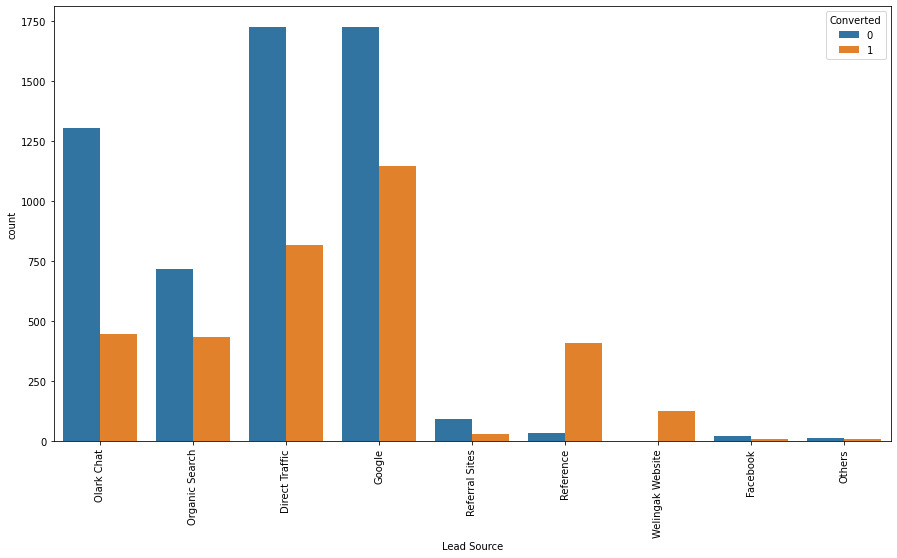

In [51]:
fig, axs= plt.subplots(figsize=(15,8))
sns.countplot(lead['Lead Source'],hue = 'Converted', data=lead)
#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
plt.xticks(rotation=90)
plt.show()

Inference:
    
    1. The count of lead from Direct Traffic and Google have Maximum non-conversion rate.
    2. Although the count of lead is less in Reference and Welingak Website, the conversion rate is on higher side.
    3. Facebook and Others categories have less number of leads.
    

We should focus on improving lead conversion from the categories olark chat, organic search, direct traffic and google since they generate good amount of leads. This way conversion of leads can be improved.

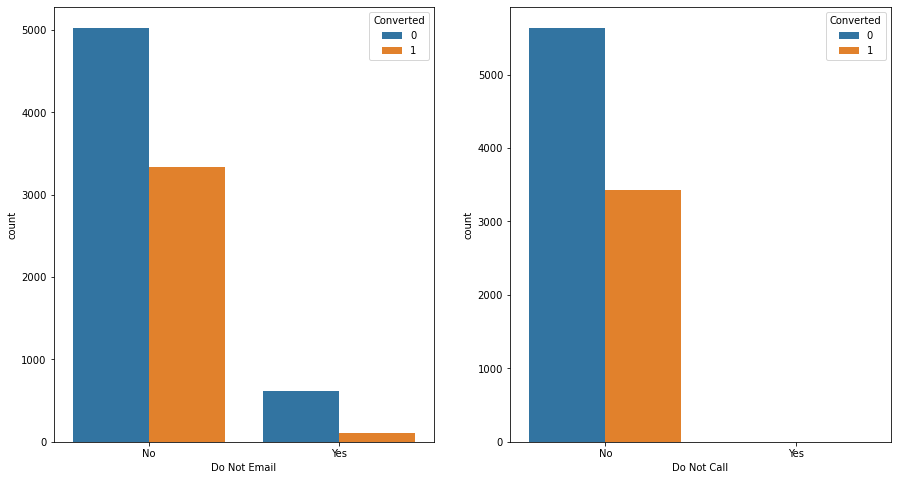

In [52]:
#'Do Not Email', 'Do Not Call'
fig, axs= plt.subplots(1,2,figsize=(15,8))
sns.countplot(lead['Do Not Email'],hue = 'Converted', data=lead,ax=axs[0])
sns.countplot(lead['Do Not Call'],hue = 'Converted', data=lead, ax=axs[1])

#matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
#plt.xticks(rotation=90)

plt.show()

#### Total Visits

In [53]:
lead['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
lead['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

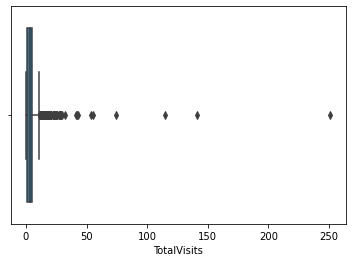

In [55]:
sns.boxplot(lead['TotalVisits'])

In [56]:
# As we can see the Outliers, so we will cap it to 95%

In [57]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

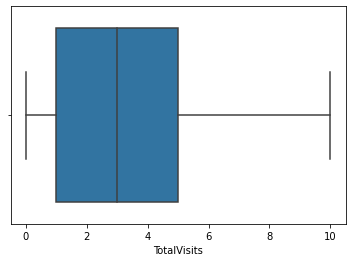

In [58]:
sns.boxplot(lead['TotalVisits'])
plt.show()

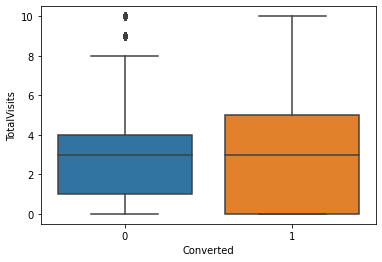

In [59]:
sns.boxplot(y='TotalVisits',x='Converted',data=lead)
plt.show()

Inference:
    
    We cannot draw any inference based on total visits, although the median for both of them is same. 

In [60]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

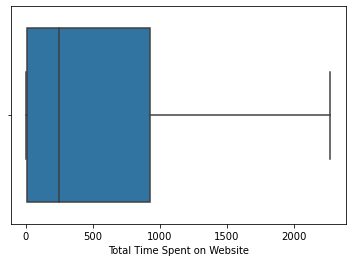

In [61]:
sns.boxplot(lead['Total Time Spent on Website'])

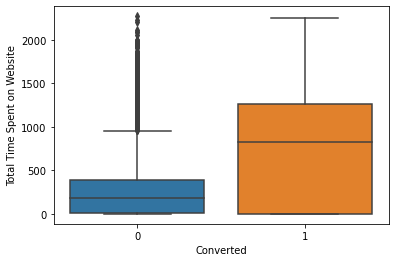

In [62]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead)
plt.show()

Inference:
    
    The Leads who spend more time on website are more likely to be converted.
    
Website should be made more engaging to make leads spend more time.



#### Page Views per visit

In [63]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

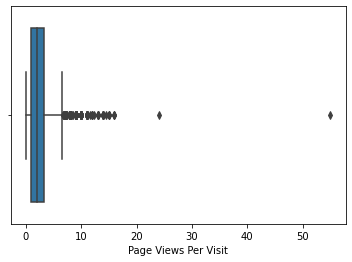

In [64]:
sns.boxplot(lead['Page Views Per Visit'])

In [65]:
# AS we can see outliers, we will add percentiles for better analysis.

In [66]:
lead['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [67]:
# As we ccan see outliers we will cap it to 95%

In [68]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

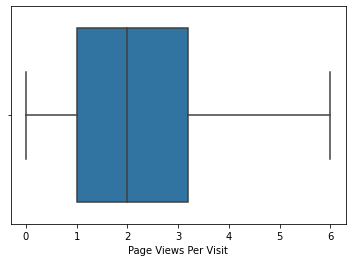

In [69]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

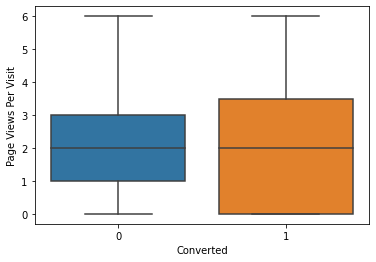

In [70]:
#against target variable
sns.boxplot(y='Page Views Per Visit',x='Converted',data=lead)
plt.show()

Inference:
    
    The median for both converted and non-converted leads is same.
    
We cannot draw any inference based on Page Views Per Visit

In [71]:
lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

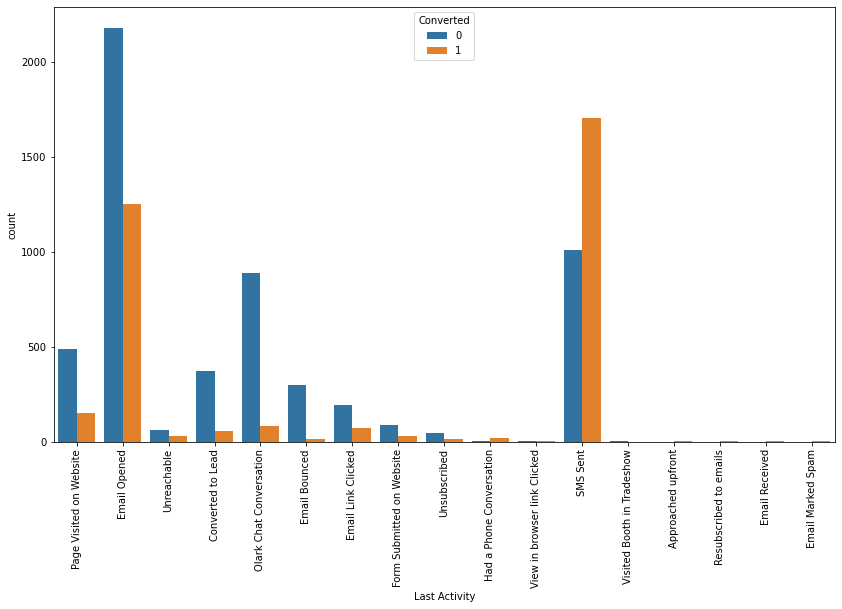

In [72]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)
plt.show()

In [73]:
lead['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [74]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','View in browser link Clicked','Approached upfront','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'],'Other_Activity')

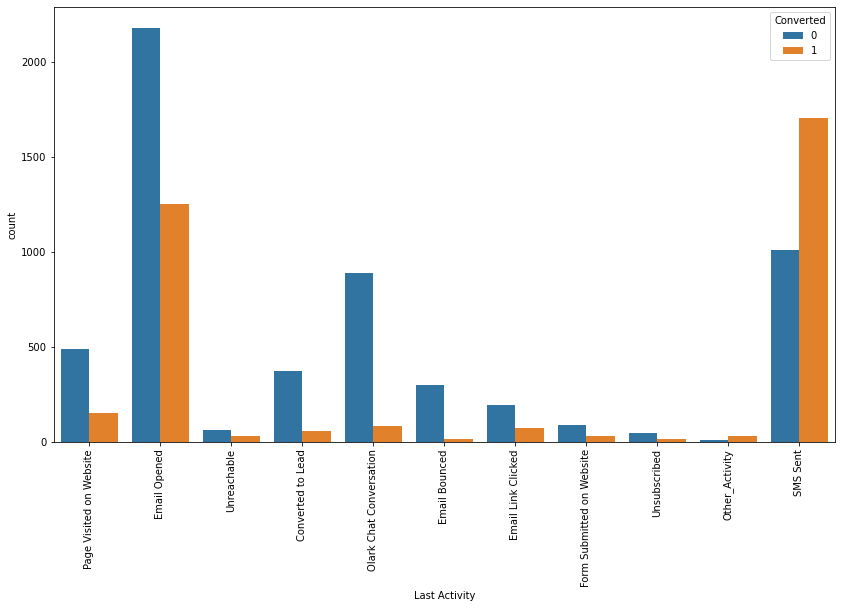

In [75]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)
plt.show()

Inference:
    
    1. Most of the lead have opened their Email as their last activity.
    2. Conversion rate for the leads is higher in SMS sent category when compared to all.
    

In [76]:
lead.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [77]:
lead.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
Germany                    4
South Africa               4
Sweden                     3
Italy                      2
China                      2
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Bangladesh                 2
Ghana                      2
Tanzania                   1
Russia                     1
Sri Lanka                  1
Liberia                    1
Switzerland                1
Denmark                    1
Kenya         

In [78]:
lead.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

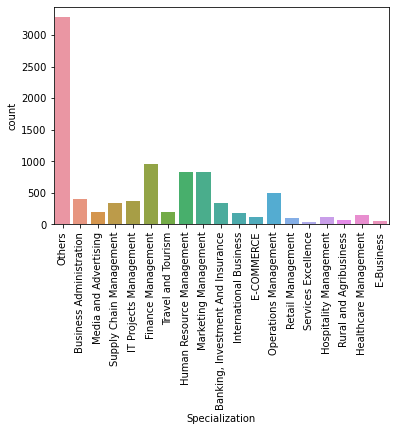

In [79]:
sns.countplot(lead.Specialization)
plt.xticks(rotation=90)
plt.show()


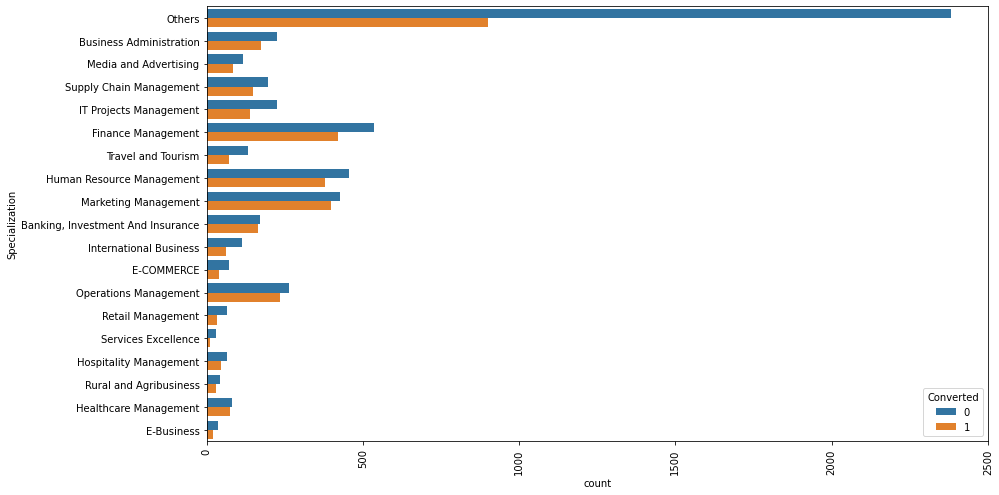

In [80]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(y='Specialization', hue='Converted', data=lead)
plt.xticks(rotation=90)
plt.show()



Inference:
    
    The Maximum incoming leads are more interested in other specializations.
    
    
since the maximum incoming leads are interested in other specializations we should focus on making feasible plans so that the conversion rate increases in that specialization.    

In [81]:
lead['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

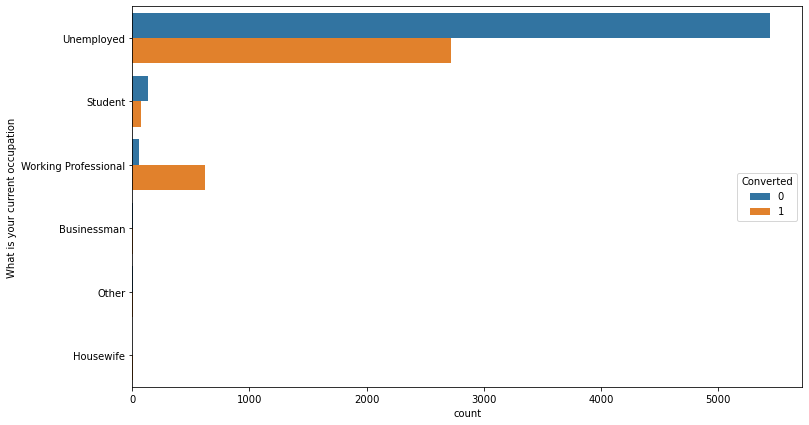

In [82]:
fig, axs= plt.subplots(figsize=(12,7))
sns.countplot(y ='What is your current occupation', hue='Converted', data=lead)
plt.show()

Inference:
    
    1. The incoming leads for the 'Unemployed' category is higher, although the conversion rate is lower.
    2. The incoming leads for the 'Working Professional' category is lower, although the conversion rate is higher.
    
    
We should focus more on the conversion rate of unemployed category also we should concentrate on increasing the leads in working professional category.
    

In [83]:
lead['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [84]:
lead['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [85]:
lead['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [86]:
lead['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [87]:
lead['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [88]:
lead['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [89]:
lead['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [90]:
lead['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [91]:
lead['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [92]:
lead['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

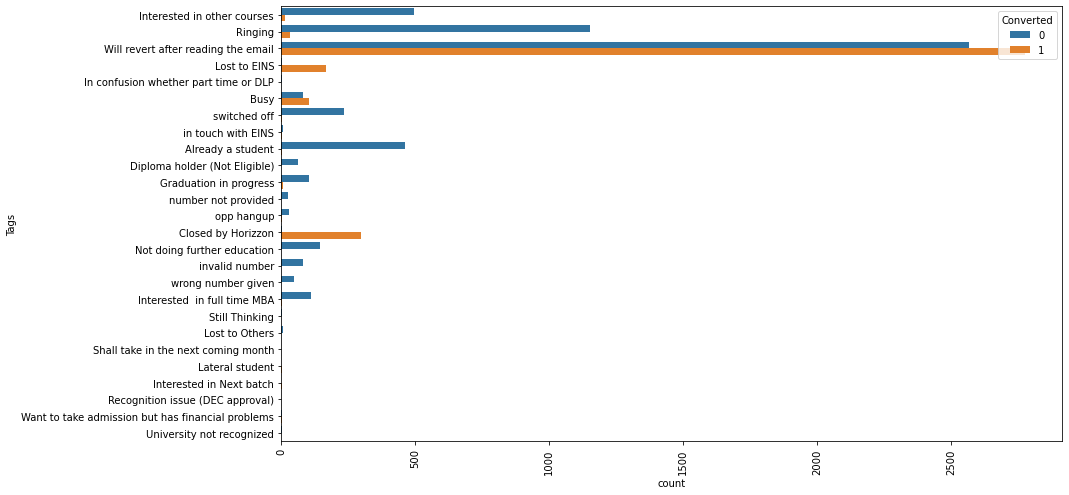

In [93]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(y='Tags', hue='Converted', data=lead)
plt.xticks(rotation=90)
plt.show()


In [94]:
lead.Tags.value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [95]:
lead['Tags'] = lead['Tags'].replace(['Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided',                                    
'in touch with EINS','Lost to Others',                                         
'Want to take admission but has financial problems',       
'Still Thinking',                                          
'In confusion whether part time or DLP',                   
'Interested in Next batch',                                
'Lateral student',                                         
'University not recognized',                               
'Shall take in the next coming month',                     
'Recognition issue (DEC approval)'],'Other_Tags')

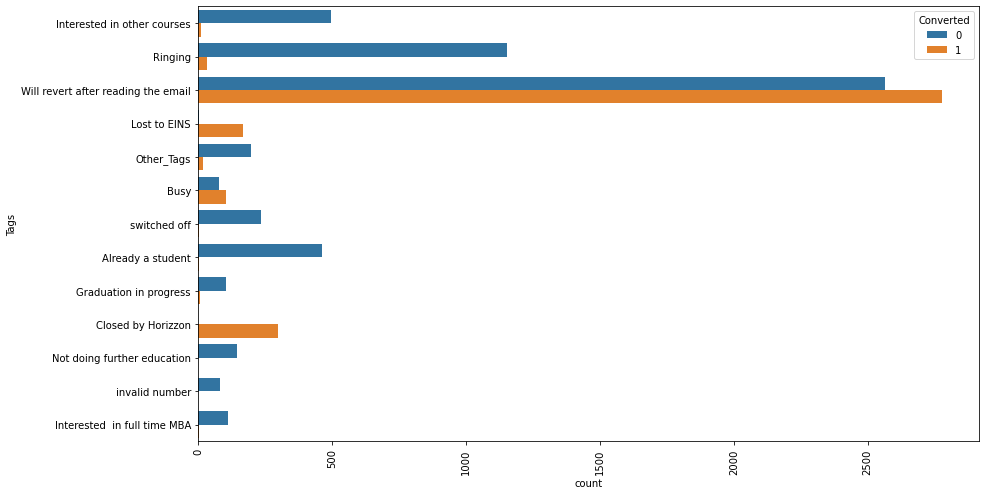

In [96]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(y='Tags', hue='Converted', data=lead)
plt.xticks(rotation=90)
plt.show()


Inference:
    
    There is a higher conversion rate in the "Will revert after reading the email" category.

In [97]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [98]:
lead['Lead Quality'].value_counts()

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

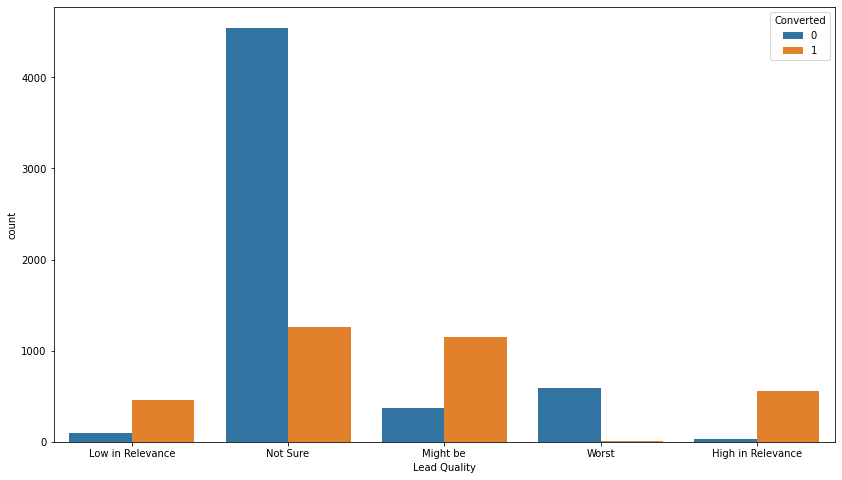

In [99]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(x='Lead Quality', hue='Converted', data=lead)
#plt.xticks(rotation=90)
plt.show()


Inference:
    
    1. The incoming leads for the 'Not Sure' category is higher, although the conversion rate is lower.
    2. The incoming leads for the 'High in Relevance' category is lower, although the conversion rate is higher.
     

In [100]:
lead['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [101]:
lead['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [102]:
lead['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [103]:
lead['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [104]:
lead['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [105]:
lead['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

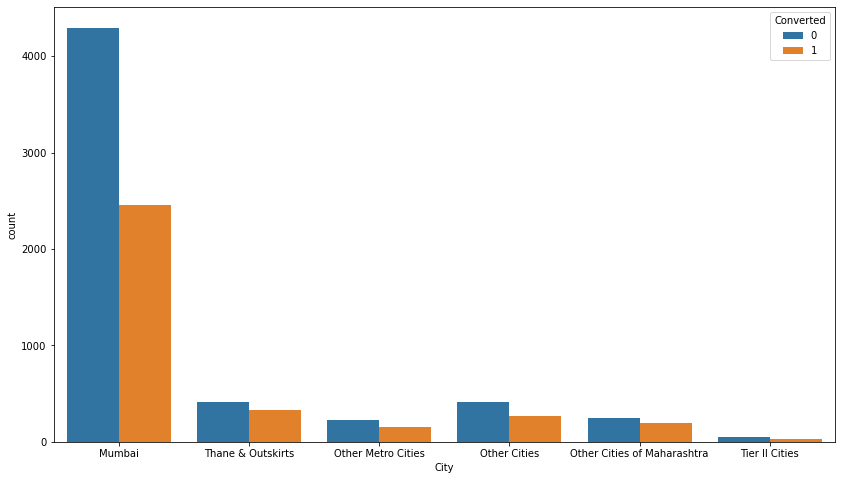

In [106]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(x='City', hue='Converted', data=lead)
#plt.xticks(rotation=90)
plt.show()


Inference:
    
    1. we can observe that conversion rate for Mumbai is higher.
    2. The people from Tier II Cities are leasted interested.
        

In [107]:
lead['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

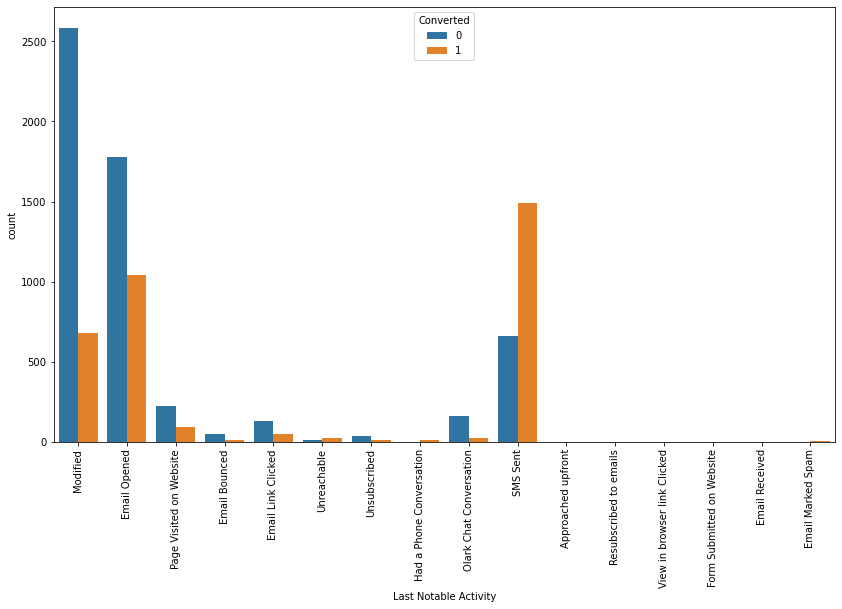

In [108]:
fig, axs= plt.subplots(figsize=(14,8))
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead)
plt.xticks(rotation=90)
plt.show()


Results:
       Based on the Univariate Analysis we found that few columns are not useful so we dropping those columns.

In [109]:
lead = lead.drop(['What matters most to you in choosing a course','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','A free copy of Mastering The Interview','Country'], axis=1)

In [110]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,I agree to pay the amount through cheque,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [111]:
lead.shape

(9074, 16)

### Data Preparation

#### Conversion some binary variables (Yes/No) to (1/0)

In [112]:
#list of variables
var_list = ['Do Not Email', 'Do Not Call']
#defining the fun
def binary(x):
    return x.map({'Yes':1,'No':0})

lead[var_list] = lead[var_list].apply(binary)

In [113]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,I agree to pay the amount through cheque,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,No,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [114]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'I agree to pay the amount through cheque', 'Last Notable Activity'],
      dtype='object')

In [115]:
lead.drop(['I agree to pay the amount through cheque'], inplace=True, axis=1)

In [116]:
# Creating dummy variables for categorical variables
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source','Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality','City','Last Notable Activity']], drop_first=True)


In [117]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
#Adding the results to Master dataframe
lead = pd.concat([lead,dummy], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [119]:
lead= lead.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality','City','Last Notable Activity'],axis=1)

In [120]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [121]:
# Importing libraries.
from sklearn.model_selection import train_test_split
X = lead.drop(['Converted'], axis=1)

In [122]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [123]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [124]:
# putting target var in y
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [125]:
# Splitting the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling.

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
# checking the conversion rate.
converted = (sum(lead['Converted'])/len(lead))*100
converted

37.85541106458012

We have almost 38% Conversion

### Model Building

#### Model 1

In [128]:
import statsmodels.api as sm

In [129]:
# Logistic regression model
m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1253.4
Date:                Wed, 13 Oct 2021   Deviance:                       2506.8
Time:                        19:10:01   Pearson chi2:                 3.84e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.1451   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -1.3631      0.327     -4.169      0.000      -2.004      -0.722
Do Not Call                                             22.6977   8.28e+04      0.000      1.000   -1.62e+05    1.62e+05
TotalVisits                                              0.1789      0.087      2.064      0.039       0.009       0.349
Total Time Spent on Website                              1.1395      0.064     17.880      0.000       1.015       1.264
Page Views Per Visit                                    -0.3283      0.099     -3.324      0.001      -0.522      -0.135
Lead Origin_Landing Page Submission                     -0.9854      0.221     -4.453      0.000      -1.419      -0.552
Lead Origin_Lead Add Form                               -0.3350      1.309     -0.256      0.798      -2.901       2.231
Lead Origin_Lead Import                                 28.6237   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                   -27.6144   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.2281      0.155      1.476      0.140      -0.075       0.531
Lead Source_Olark Chat                                   0.8834      0.234      3.782      0.000       0.426       1.341
Lead Source_Organic Search                               0.2563      0.210      1.220      0.222      -0.155       0.668
Lead Source_Others                                       0.7804      0.815      0.957      0.338      -0.817       2.378
Lead Source_Reference                                    1.7571      1.366      1.286      0.198      -0.921       4.435
Lead Source_Referral Sites                              -0.0693      0.491     -0.141      0.888      -1.031       0.892
Lead Source_Welingak Website                             5.4045      1.506      3.590      0.000       2.454       8.355
Last Activity_Email Bounced                             -0.5736      0.873     -0.657      0.511      -2.284       1.137
Last Activity_Email Link Clicked                         0.8310      0.644      1.290      0.197      -0.431       2.093
Last Activity_Email Opened                              -0.0144      0.385     -0.037      0.970      -0.768       0.739
Last Activity_Form Submitted on Website                  0.1203      0.593      0.203      0.839      -1.041       1.282
Last Activity_Olark Chat Conversation                   -0.5568      0.392     -1.422      0.155      -1.324       0.211
Last Activity_Other_Activity                             1

### Feature Selection using RFE

In [130]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)  # running rfe with 15 vars as output
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 32),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 41),
 ('Lead Source_Reference', False, 69),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 66),
 ('Last Activity_Form Submitted on Website', False, 70),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 35),
 ('Last Activity_SMS Sent', 

In [133]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [134]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Mana

#### Assessing the model with statsmodel

In [135]:
X_train_sm = sm.add_constant(X_train[col])
m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1582.2
Date:                Wed, 13 Oct 2021   Deviance:                       3164.4
Time:                        19:10:11   Pearson chi2:                 3.11e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8526      0.279     -3.051      0.002      -1.400      -0.305
Do Not Email                                  -1.3179      0.211     -6.233      0.000      -1.732      -0.903
Lead Origin_Lead Add Form                      1.0686      0.364      2.934      0.003       0.355       1.782
Lead Origin_Lead Import                        0.5140      0.751      0.684      0.494      -0.958       1.986
Lead Source_Welingak Website                   3.4482      0.819      4.210      0.000       1.843       5.053
What is your current occupation_Unemployed    -1.1353      0.238     -4.777      0.000      -1.601      -0.670
Tags_Busy                                      3.6612      0.331     11.048      0.000       3.012       4.311
Tags_Closed by Horizzon                        7.8499      0.762     10.302      0.000       6.356       9.343
Tags_Lost to EINS                              9.0729      0.754     12.033      0.000       7.595      10.551
Tags_Ringing                                  -1.8322      0.339     -5.406      0.000      -2.496      -1.168
Tags_Will revert after reading the email       3.8343      0.228     16.806      0.000       3.387       4.281
Tags_invalid number                          -22.3210   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                             -2.4307      0.589     -4.130      0.000      -3.584      -1.277
Lead Quality_Not Sure                         -3.3227      0.129    -25.682      0.000      -3.576      -3.069
Lead Quality_Worst                            -3.9671      0.835     -4.751      0.000      -5.604      -2.330
Last Notable Activity_SMS Sent                 2.7838      0.122     22.869      0.000       2.545       3.022
==============================================================================================================
"""

In [136]:
col = col.drop(['Tags_invalid number'], 1)

In [137]:
col1 = col
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model 2

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.7
Date:                Wed, 13 Oct 2021   Deviance:                       3175.4
Time:                        19:10:12   Pearson chi2:                 3.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9690      0.283     -3.426      0.001      -1.523      -0.415
Do Not Email                                  -1.3107      0.211     -6.213      0.000      -1.724      -0.897
Lead Origin_Lead Add Form                      1.0992      0.366      3.003      0.003       0.382       1.816
Lead Origin_Lead Import                        0.5257      0.753      0.698      0.485      -0.950       2.001
Lead Source_Welingak Website                   3.4133      0.820      4.165      0.000       1.807       5.020
What is your current occupation_Unemployed    -1.1758      0.240     -4.903      0.000      -1.646      -0.706
Tags_Busy                                      3.8315      0.330     11.601      0.000       3.184       4.479
Tags_Closed by Horizzon                        7.9929      0.762     10.483      0.000       6.498       9.487
Tags_Lost to EINS                              9.2192      0.754     12.219      0.000       7.740      10.698
Tags_Ringing                                  -1.6460      0.337     -4.883      0.000      -2.307      -0.985
Tags_Will revert after reading the email       3.9877      0.229     17.382      0.000       3.538       4.437
Tags_switched off                             -2.2384      0.587     -3.812      0.000      -3.389      -1.087
Lead Quality_Not Sure                         -3.3132      0.129    -25.665      0.000      -3.566      -3.060
Lead Quality_Worst                            -3.9568      0.837     -4.730      0.000      -5.596      -2.317
Last Notable Activity_SMS Sent                 2.7454      0.120     22.863      0.000       2.510       2.981
==============================================================================================================
"""

#### Checking VIFS

In [139]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,7.19
11,Lead Quality_Not Sure,4.04
9,Tags_Will revert after reading the email,3.82
8,Tags_Ringing,1.80
1,Lead Origin_Lead Add Form,1.58
13,Last Notable Activity_SMS Sent,1.52
12,Lead Quality_Worst,1.35
3,Lead Source_Welingak Website,1.34
6,Tags_Closed by Horizzon,1.25
10,Tags_switched off,1.16


In [141]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.186892
1012    0.167251
9226    0.000821
4750    0.781612
7987    0.977271
1281    0.989932
2880    0.186892
4971    0.753784
7536    0.863287
1248    0.000821
dtype: float64

In [142]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.86892086e-01, 1.67250558e-01, 8.21138983e-04, 7.81611922e-01,
       9.77271446e-01, 9.89932071e-01, 1.86892086e-01, 7.53784214e-01,
       8.63287088e-01, 8.21138983e-04])

#### Creating  a df with actual churn flag and predicted probabilities.


In [143]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_probab':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_probab
0,0,0.186892
1,0,0.167251
2,0,0.000821
3,1,0.781612
4,1,0.977271


#### Creating a var predicted where churn_probab > 0.5 as 1 and <0 as 0

In [144]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probab.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_probab,predicted
0,0,0.186892,0
1,0,0.167251,0
2,0,0.000821,0
3,1,0.781612,1
4,1,0.977271,1


In [145]:
from sklearn import metrics

#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3756  149]
 [ 363 2083]]


In [146]:
# Predicted  non_churn  churn
# Actual
# non_churn   3756      149
# churn       363     2083


In [147]:
# Lets check overall accuracy 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


#### Metrics beyond accuracy

In [148]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] #False positive
FN = confusion[1,0]  # False Negatives

In [149]:
# lets see sensitivity of our model
TP/float(TP+FN)

0.8515944399018807

In [150]:
# lets see sPECIFICIity of our model
TN/float(TN+FP)

0.9618437900128041

In [151]:
# calculating false positive rate - predicting churn when customer did not churn.
FP/float(TN+FP)

0.038156209987195905

In [152]:
#positive predicted value
TP/float(TP+FP)

0.9332437275985663

In [153]:
##negative predicted value
TN/float(TN+FN)

0.9118718135469774

### Plotting ROC Curve

In [154]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or[1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [155]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probab,drop_intermediate=False )

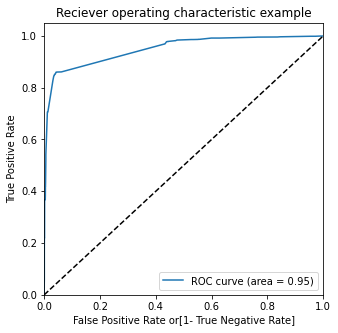

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probab)

The area under ROC curve should  be a value  around 1. We are getting a good value of 0.97 indicating a good predictive model.

#### Finding Optimal Cut-Off

In [157]:
# Lets create columns with different probability cutoffs
numbers  =  [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_probab.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_probab,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.186892,0,1,1,0,0,0,0,0,0,0,0
1,0,0.167251,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000821,0,1,0,0,0,0,0,0,0,0,0
3,1,0.781612,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977271,1,1,1,1,1,1,1,1,1,1,1


In [158]:
# now lets calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci =  cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)    

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705086  0.981603  0.531882
0.2   0.2  0.908676  0.860998  0.938540
0.3   0.3  0.920013  0.859771  0.957746
0.4   0.4  0.919855  0.858953  0.958003
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919383  0.845462  0.965685
0.8   0.8  0.879074  0.707277  0.986684
0.9   0.9  0.819556  0.540883  0.994110


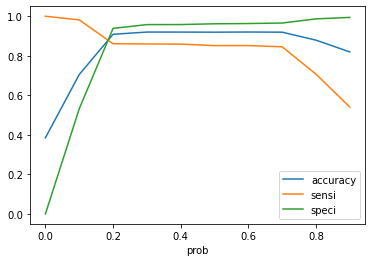

In [159]:
# lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [160]:
# From the above curve , 0.2 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probab.map(lambda x: 1 if x>0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_probab,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.186892,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.167251,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000821,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.781612,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977271,1,1,1,1,1,1,1,1,1,1,1,1


In [162]:
y_train_pred_final['Lead_Score']  = y_train_pred_final.Converted_probab.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_probab','final_predicted','Lead_Score']].head()

,Converted,Converted_probab,final_predicted,Lead_Score
0,0,0.186892,0,19
1,0,0.167251,0,17
2,0,0.000821,0,0
3,1,0.781612,1,78
4,1,0.977271,1,98


In [163]:
#Lets ccheck the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


In [164]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3665,  240],
       [ 340, 2106]], dtype=int64)

In [165]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [166]:
# lets see sensitivity of our model
TP/float(TP+FN)

0.8609975470155355

In [167]:
# lets see sPECIFICIity of our model
TN/float(TN+FP)

0.93854033290653

Observation:
    So we can see above the model seems to be performing well. The ROC curve has a value of 0.95, which is very good. We have the following values for the Train Data:
    
    
      Accuracy: 91.93%
      Sensitivity: 86.09%
      Specificity: 93.85%

In [168]:
# calculating false positive rate - predicting churn when customer did not churn.
FP/float(TN+FP)

0.06145966709346991

In [169]:
#positive predicted value
TP/float(TP+FP)

0.8976982097186701

In [170]:
##negative predicted value
TN/float(TN+FN)

0.9151061173533084

## Precision and Recall

In [171]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3756  149]
 [ 363 2083]]


In [172]:
# PRECISION
#TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

In [173]:
#Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

#### using sklearn utilities for the same

In [174]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [176]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [177]:
p, r, threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probab)

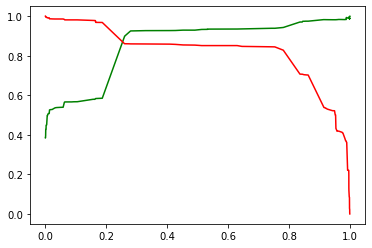

In [178]:
plt.plot(threshold, p[:-1],"g-")
plt.plot(threshold, r[:-1], "r-")
plt.show()

In [179]:
## Scaling test set
num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols]= scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,-0.292789,0.0,0.304501,-0.591008,0.998931,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,-0.292789,0.0,0.666261,1.894051,1.564920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.292789,0.0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,-0.292789,0.0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,-0.292789,0.0,1.751544,-0.578179,2.130909,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Welingak Website,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,-0.292789,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,-0.292789,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,-0.292789,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,-0.292789,1,0,0,0,0,1,0,0,0,0,0,0,0
3830,-0.292789,0,0,0,1,0,0,0,0,1,0,1,0,0


In [181]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on test set 

In [182]:
y_test_pred = res.predict(X_test_sm)

In [183]:
y_test_pred[:10]

3271    0.252266
1490    0.967781
7936    0.252266
4216    0.999798
3830    0.252266
1800    0.967781
6507    0.018437
4821    0.000667
4223    0.997697
4714    0.252266
dtype: float64

In [184]:
# converting y_pred to a df 
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.252266
1490,0.967781
7936,0.252266
4216,0.999798
3830,0.252266


In [185]:
# converting y test to df
y_test_df = pd.DataFrame(y_test)


In [186]:
# Removing index for both dfs to append them side by side
y_pred_1.reset_index(drop= True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending
y_pred_final = pd.concat([y_test_df, y_pred_1], axis =1)

In [188]:
y_pred_final.head()

,Converted,0
0,0,0.252266
1,1,0.967781
2,0,0.252266
3,1,0.999798
4,0,0.252266


In [189]:
y_pred_final = y_pred_final.rename(columns={0:"Converted_probab"})

In [190]:
y_pred_final.head()

,Converted,Converted_probab
0,0,0.252266
1,1,0.967781
2,0,0.252266
3,1,0.999798
4,0,0.252266


In [191]:
# Rearranging the columns
y_pred_final['Lead_Score'] = y_pred_final.Converted_probab.map(lambda x: round(x*100))

In [192]:
y_pred_final.head()

,Converted,Converted_probab,Lead_Score
0,0,0.252266,25
1,1,0.967781,97
2,0,0.252266,25
3,1,0.999798,100
4,0,0.252266,25


In [193]:
y_pred_final['final_predicted']= y_pred_final.Converted_probab.map(lambda x: 1 if x>0.2 else 0)

In [194]:
y_pred_final.head()

,Converted,Converted_probab,Lead_Score,final_predicted
0,0,0.252266,25,1
1,1,0.967781,97,1
2,0,0.252266,25,1
3,1,0.999798,100,1
4,0,0.252266,25,1


In [195]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6995960337862651

In [196]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[957, 777],
       [ 41, 948]], dtype=int64)

In [197]:
TP = confusion2[1,1] # True positive
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [198]:
# lets see sensitivity of our model
TP/float(TP+FN)

0.9585439838220424

In [199]:
# lets see sPECIFICIity of our model
TN/float(TN+FP)

0.5519031141868512

In [200]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9332437275985663

In [201]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8515944399018807

### Observation:
After running the test model the figuress are:

Accuracy: 69.95%

Sensitivity: 95.85%

Specificity: 55.19%


### Train data:

Accuracy: 91.93%

Sensitivity: 86.09%

Specificity: 93.85%

### Test data:


Accuracy: 69.95%

Sensitivity: 95.85%

Specificity: 55.19%


The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.